In [1]:
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib
sns.set()

In [3]:
test=pd.read_csv('spaceshipTitanic/test.csv')
train=pd.read_csv('spaceshipTitanic/train.csv')

In [4]:
test.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [6]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
train.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Anton Woody
freq,1,4602,5439,8,5915,8291,2


In [9]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
transported = train[train['Transported'] == 1]
not_transported = train[train['Transported'] == 0]

print ("Transported: %i (%.2f%%)"%(len(transported), (len(transported))/len(train)*100.0))
print ("Not transported: %i (%.2f%%)"%(len(not_transported), (len(not_transported))/len(train)*100.0))
print ("Total: %i"%len(train))

Transported: 4378 (50.36%)
Not transported: 4315 (49.64%)
Total: 8693


In [12]:
train['VIP']

0       False
1       False
2        True
3       False
4       False
        ...  
8688     True
8689    False
8690    False
8691    False
8692    False
Name: VIP, Length: 8693, dtype: object

In [13]:
train.groupby('VIP').Transported.value_counts()

VIP    Transported
False  True           4198
       False          4093
True   False           123
       True             76
Name: count, dtype: int64

In [14]:
train[['VIP', 'Transported']].groupby('VIP', as_index = True).mean()

,Transported
VIP,
False,0.506332
True,0.381910


Пассажиры класса вип имеют большие шансы достигнуть новые планеты.

In [15]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [16]:
train[['HomePlanet', 'Transported']].groupby('HomePlanet', as_index = True).mean()

,Transported
HomePlanet,
Earth,0.423946
Europa,0.658846
Mars,0.523024


<Axes: xlabel='HomePlanet'>

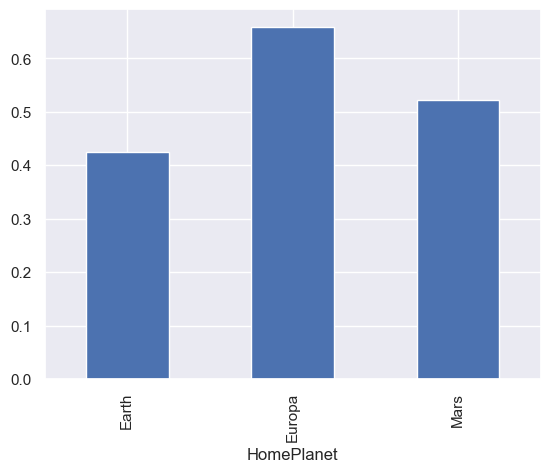

In [17]:
train.groupby('HomePlanet').Transported.mean().plot(kind='bar')

Также больше всего шансов у Землян.

C:\Users\roman\AppData\Local\Temp\ipykernel_15636\1521297088.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='HomePlanet', y='Transported', hue='VIP', aspect=2, data=train, kind='point', ci=None)


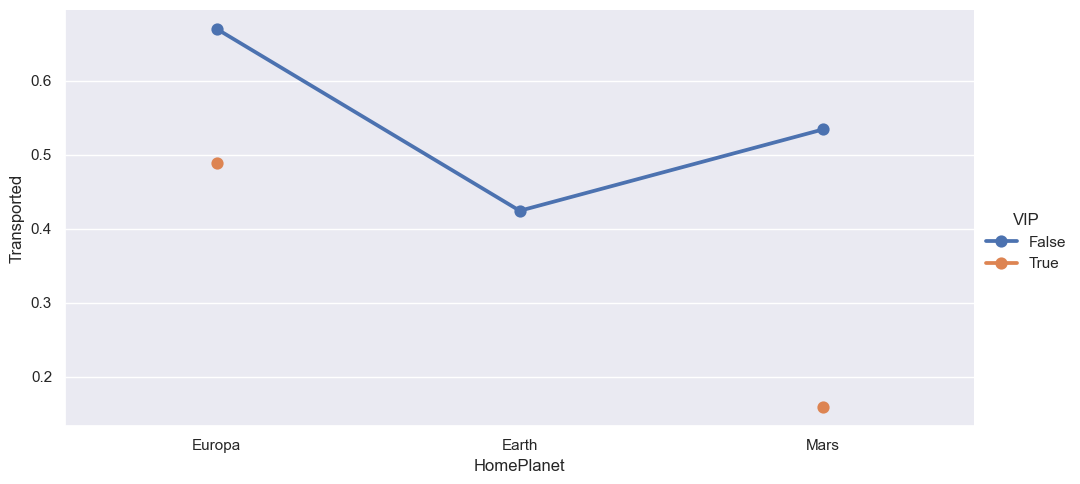

In [18]:
sns.catplot(x='HomePlanet', y='Transported', hue='VIP', aspect=2, data=train, kind='point', ci=None)

In [19]:
train.groupby('VIP').HomePlanet.value_counts()

VIP    HomePlanet
False  Earth         4487
       Europa        1958
       Mars          1653
True   Europa         131
       Mars            63
Name: count, dtype: int64

In [20]:
train.corr(method='pearson', min_periods=1, numeric_only=True)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


Все люди с Земли не в классе ВИП. Займёмся извлечение  признаков, а затем продолжим изучение датасета.

In [21]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Deck'] = dataset.Cabin.str.extract('([A-Z])')
    dataset['CabinNumber']=  dataset.Cabin.str.extract('([0-9]+)')
    dataset['Side']=  dataset.Cabin.str.extract('([PS])')
    dataset['Group']=  dataset.PassengerId.str.extract('([0-9])+_')
    dataset['NumberInGroup']=  dataset.PassengerId.str.extract('_([0-9])+')

In [22]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,CabinNumber,Side,Group,NumberInGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,4,1
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,F,0,P,5,1
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,F,2,S,6,1
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,G,0,S,6,2
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,F,3,S,7,1
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,B,1,P,8,1


Извлекли новые фичи, теперь переведём данные в численные значения и заполним пропуски

In [23]:
train.isnull().sum()

PassengerId        0
HomePlanet       201
CryoSleep        217
Cabin            199
Destination      182
Age              179
VIP              203
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Name             200
Transported        0
Deck             199
CabinNumber      199
Side             199
Group              0
NumberInGroup      0
dtype: int64

In [24]:
train.HomePlanet.value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [25]:
for dataset in train_test_data:
    dataset['HomePlanet'] = dataset['HomePlanet'].fillna('Earth')

In [26]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

for dataset in train_test_data:
    dataset['AgeBand'] = pd.cut(train['Age'], 5)

print (train[['AgeBand', 'Transported']].groupby(['AgeBand'], as_index=False).mean())

          AgeBand  Transported
0  (-0.079, 15.8]     0.649600
1    (15.8, 31.6]     0.475402
2    (31.6, 47.4]     0.483983
3    (47.4, 63.2]     0.486747
4    (63.2, 79.0]     0.463235


C:\Users\roman\AppData\Local\Temp\ipykernel_15636\3056128142.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
C:\Users\roman\AppData\Local\Temp\ipykernel_15636\3056128142.py:

In [27]:
for dataset in train_test_data:
    age_min = dataset['Age'].min()

In [28]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,CabinNumber,Side,Group,NumberInGroup,AgeBand
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,1,1,"(31.6, 47.4]"
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,2,1,"(15.8, 31.6]"
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,3,1,"(47.4, 63.2]"
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,3,2,"(31.6, 47.4]"
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,4,1,"(15.8, 31.6]"


In [29]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,CabinNumber,Side,Group,NumberInGroup,AgeBand
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,2,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,1,1,"(31.6, 47.4]"
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,1,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,2,1,"(15.8, 31.6]"
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,3,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,3,1,"(47.4, 63.2]"
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,2,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,3,2,"(31.6, 47.4]"
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,4,1,"(15.8, 31.6]"


In [30]:
title_mapping = {"Earth": 1, "Mars": 2, "Europa": 3}
for dataset in train_test_data:
    dataset['HomePlanet'] = dataset['HomePlanet'].map(title_mapping)

In [31]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,CabinNumber,Side,Group,NumberInGroup,AgeBand
0,0001_01,3,False,B/0/P,TRAPPIST-1e,2,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,1,1,"(31.6, 47.4]"
1,0002_01,1,False,F/0/S,TRAPPIST-1e,1,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,2,1,"(15.8, 31.6]"
2,0003_01,3,False,A/0/S,TRAPPIST-1e,3,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,3,1,"(47.4, 63.2]"
3,0003_02,3,False,A/0/S,TRAPPIST-1e,2,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,3,2,"(31.6, 47.4]"
4,0004_01,1,False,F/1/S,TRAPPIST-1e,0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,4,1,"(15.8, 31.6]"


In [32]:
train[train.RoomService.isna() & train.FoodCourt.isna()].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,CabinNumber,Side,Group,NumberInGroup,AgeBand
908,0982_02,1,False,G/145/P,TRAPPIST-1e,3,False,NaN,NaN,4.0,0.0,0.0,Joyton Hewson,False,G,145,P,2,2,"(47.4, 63.2]"
2754,2960_01,1,False,F/562/S,TRAPPIST-1e,3,False,NaN,NaN,0.0,0.0,0.0,Gracia Carterson,False,F,562,S,0,1,"(47.4, 63.2]"


Не существует таких строк где все данные по количеству потраченных данных отсутствуют, поэтому заполним остутсвующие средним значением по остальным

In [33]:
for data in train_test_data:
        for item in['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']:
            data[item]=data[item].fillna(data[['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']].mean(axis=1))

Теперь посмотри кореляции между фичами извлечёнными из cabin и остальными, чтоб заполнить отсутвующие данные

Transported  False  True 
Side                     
P             2308   1898
S             1908   2380


<Axes: xlabel='Side'>

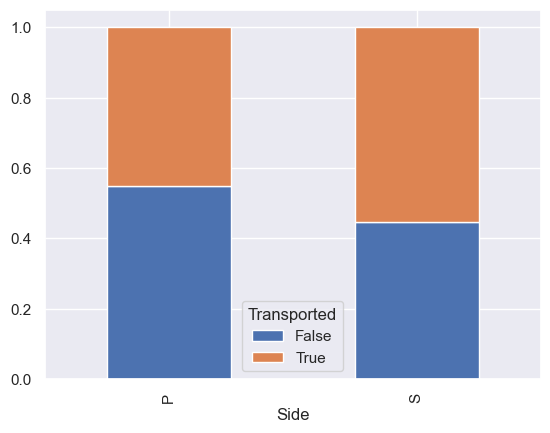

In [34]:
tab = pd.crosstab(train['Side'], train['Transported'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

In [35]:
train.Side.value_counts()

Side
S    4288
P    4206
Name: count, dtype: int64

In [36]:
tab=pd.crosstab(train.Side.isnull(),train.Transported)

<Axes: xlabel='Side'>

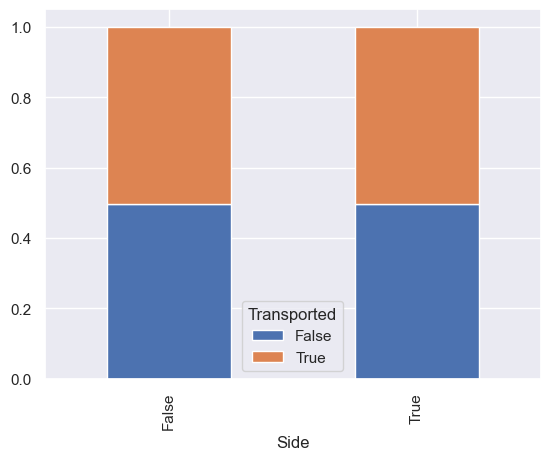

In [37]:
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

In [38]:
for dataset in train_test_data:
    dataset.Group=dataset.Group.astype(int)
    dataset.NumberInGroup=dataset.NumberInGroup.astype(int)
    dataset.CabinNumber=dataset.CabinNumber.astype(float)
    dataset.CryoSleep=dataset.CryoSleep.astype(bool)
title_mapping = {"P": 1, "S": 2}
for dataset in train_test_data:
    dataset['Side'] = dataset['Side'].map(title_mapping)


In [39]:
title_mapping = {"TRAPPIST-1e": 1, "55 Cancri e": 2,'PSO J318.5-22': 3}
for dataset in train_test_data:
    dataset['Destination'] = dataset['Destination'].map(title_mapping)
    dataset['Destination'] = dataset['Destination'].fillna(1)
    dataset['VIP']=dataset['VIP'].fillna(False)

C:\Users\roman\AppData\Local\Temp\ipykernel_15636\4137375805.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['VIP']=dataset['VIP'].fillna(False)
C:\Users\roman\AppData\Local\Temp\ipykernel_15636\4137375805.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['VIP']=dataset['VIP'].fillna(False)


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for dataset in train_test_data:
    dataset['Deck'] = le.fit_transform(dataset['Deck'])

In [41]:
train.corr(method='pearson', min_periods=1, numeric_only=True)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNumber,Side,Group,NumberInGroup
HomePlanet,1.000000,0.112307,-0.044477,0.200995,0.171678,0.056901,0.316018,0.041508,0.233669,0.237477,0.190876,-0.802634,-0.472243,0.029442,0.023349,0.093759
CryoSleep,0.112307,1.000000,0.116228,-0.076886,-0.080247,-0.244578,-0.204572,-0.211909,-0.199979,-0.193079,0.451744,0.023744,-0.035881,0.016187,-0.009403,0.062948
Destination,-0.044477,0.116228,1.000000,-0.014556,0.027678,-0.068137,0.025830,-0.036574,-0.000274,0.016320,0.067972,0.017052,0.004863,0.002556,-0.024992,-0.010474
Age,0.200995,-0.076886,-0.014556,1.000000,0.080294,0.057346,0.117345,0.030819,0.114245,0.092891,-0.069662,-0.198839,-0.105935,0.010589,0.014675,-0.120777
VIP,0.171678,-0.080247,0.027678,0.080294,1.000000,0.057310,0.126813,0.021566,0.061781,0.123312,-0.037261,-0.168489,-0.098493,-0.010163,0.009479,0.000703
RoomService,0.056901,-0.244578,-0.068137,0.057346,0.057310,1.000000,0.011130,0.063859,0.028435,0.008774,-0.241438,-0.021518,-0.012874,-0.013490,-0.006047,-0.022592
FoodCourt,0.316018,-0.204572,0.025830,0.117345,0.126813,0.011130,1.000000,0.004638,0.223225,0.230771,0.043871,-0.304623,-0.181888,0.019971,0.005711,0.023027
ShoppingMall,0.041508,-0.211909,-0.036574,0.030819,0.021566,0.063859,0.004638,1.000000,0.025847,0.011710,0.002749,-0.043422,-0.004313,-0.020132,0.011087,-0.035571
Spa,0.233669,-0.199979,-0.000274,0.114245,0.061781,0.028435,0.223225,0.025847,1.000000,0.166782,-0.220473,-0.205883,-0.131664,0.002160,-0.000625,0.017815
VRDeck,0.237477,-0.193079,0.016320,0.092891,0.123312,0.008774,0.230771,0.011710,0.166782,1.000000,-0.205781,-0.244241,-0.138005,-0.009013,0.004719,0.009520


In [42]:
train.groupby('Deck').HomePlanet.value_counts()

Deck  HomePlanet
0     3              252
      1                4
1     3              766
      1               13
2     3              734
      1               13
3     2              282
      3              186
      1               10
4     1              418
      2              330
      3              128
5     1             1684
      2             1110
6     1             2559
7     3                4
      1                1
8     1              101
      3               61
      2               37
Name: count, dtype: int64

HomePlanet     1     2    3
Deck                       
0              4     0  252
1             13     0  766
2             13     0  734
3             10   282  186
4            418   330  128
5           1684  1110    0
6           2559     0    0
7              1     0    4
8            101    37   61


<Axes: xlabel='Deck'>

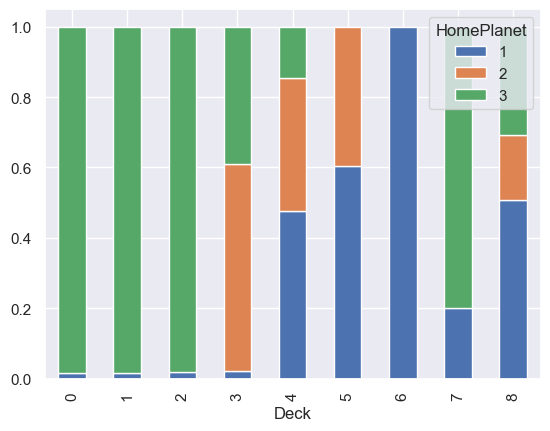

In [43]:
tab = pd.crosstab(train['Deck'], train['HomePlanet'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

Видим, что большинство выходцев с планеты номер 3 на 0,1,2 и 7 палубе
на 4,5 б, и 8 большинство людей с 1ой, на 3ей же палубе люди со 2ой. Используем эти данные для заполнения пропусков по палубам. Однако остальные фичи извлечёёые из Cabin не имеют сильных кореляций с другими данными, заполним их -1.

In [44]:
for data in train_test_data:
    data[data['HomePlanet']==1]['Deck'].fillna(np.random.randint(4,7));
    data[data['HomePlanet']==2]['Deck'].fillna(3);
    data[data['HomePlanet']==3]['Deck'].fillna(np.random.randint(0,3));

In [45]:
for data in train_test_data:
    data['Side'] = data['Side'].fillna(-1)
    data['CabinNumber'] = data['CabinNumber'].fillna(-1)

In [46]:
train.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            199
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             200
Transported        0
Deck               0
CabinNumber        0
Side               0
Group              0
NumberInGroup      0
AgeBand            0
dtype: int64

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    8693 non-null   object  
 1   HomePlanet     8693 non-null   int64   
 2   CryoSleep      8693 non-null   bool    
 3   Cabin          8494 non-null   object  
 4   Destination    8693 non-null   float64 
 5   Age            8693 non-null   int64   
 6   VIP            8693 non-null   bool    
 7   RoomService    8693 non-null   float64 
 8   FoodCourt      8693 non-null   float64 
 9   ShoppingMall   8693 non-null   float64 
 10  Spa            8693 non-null   float64 
 11  VRDeck         8693 non-null   float64 
 12  Name           8493 non-null   object  
 13  Transported    8693 non-null   bool    
 14  Deck           8693 non-null   int64   
 15  CabinNumber    8693 non-null   float64 
 16  Side           8693 non-null   float64 
 17  Group          8693 non-null   in

Заполнили все пропуски и привели все категориальные признаки к численным, приступим у обучению модели.

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
features_drop = ['Name', 'Cabin','AgeBand']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)


In [50]:
X_train = train.drop('Transported', axis=1)
y_train = train['Transported']

X_test = test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((8693, 15), (8693,), (4277, 15))

In [51]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

99.95


In [52]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNumber,Side,Group,NumberInGroup
0,0013_01,1,True,1.0,1,False,0.0,0.0,0.0,0.0,0.0,6,3.0,2.0,3,1
1,0018_01,1,False,1.0,1,False,0.0,9.0,0.0,2823.0,0.0,5,4.0,2.0,8,1
2,0019_01,3,True,2.0,1,False,0.0,0.0,0.0,0.0,0.0,2,0.0,2.0,9,1
3,0021_01,3,False,1.0,2,False,0.0,6652.0,0.0,181.0,585.0,2,1.0,2.0,1,1
4,0023_01,1,False,1.0,1,False,10.0,0.0,635.0,0.0,0.0,5,5.0,2.0,3,1


In [53]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Transported": y_pred_random_forest
    })

In [54]:
submission.to_csv('submission.csv', index=False)

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [56]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)


99.95


In [57]:
submission1 = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Transported": y_pred_decision_tree
    })

In [58]:
submission1.to_csv('submission1.csv', index=False)

In [60]:
test.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Deck             0
CabinNumber      0
Side             0
Group            0
NumberInGroup    0
dtype: int64

In [71]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

83.38


In [72]:
submission2 = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Transported": y_pred_knn
    })

In [73]:
submission2.to_csv('submission2.csv', index=False)

Из всех представленных моделей лучший результат показал RandomForestClassifier c результатом 0.79588.
